In [22]:
#takes the neuron weights from several networks trained in the same data set as the input data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import tensorflow as tf

In [2]:
#loads data
w= pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising_NN/32x32/das_data/W_70_1.csv')
#creates a data frame containing all the data
for i in range(2,19):
    dummy=pd.read_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising_NN/32x32/das_data/W_70_'+str(2)+'.csv')
    dum2 = dummy.drop(['Unnamed: 0'], axis = 1)
    w=pd.concat([w,dum2],axis=1)


np.shape(w)

(1024, 1261)

In [3]:
w=w.drop(['Unnamed: 0'], axis=1)
#transpose such that the features (pixels) are presented as columns and the rows are observations
#such that the first 70 rows are the weights for the 70 hidden neurons in the first neural network
#the next 70 rows are the weights for the 70 hidden neurons in the second neural network and so on



In [4]:
w=w.T
w.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.011677,-0.008181,-0.009393,-0.011679,-0.010687,-0.009659,-0.010547,-0.009199,-0.010274,-0.011729,...,-0.012044,-0.011071,-0.012781,-0.014279,-0.011534,-0.007759,-0.011584,-0.009695,-0.010758,-0.013003
1,0.000212,0.000273,0.000202,0.000253,0.000301,0.000321,0.000271,0.000089,0.000321,0.000183,...,-0.000007,0.000034,0.000210,0.000136,0.000150,0.000343,0.000267,0.000320,0.000307,0.000105
2,-0.006268,-0.005727,-0.004714,-0.006211,-0.007390,-0.007212,-0.006862,-0.002563,-0.007924,-0.005423,...,-0.001938,-0.002260,-0.007194,-0.006576,-0.004623,-0.006966,-0.006850,-0.007167,-0.008032,-0.005015
3,0.011389,0.008075,0.009212,0.011330,0.010432,0.009458,0.010307,0.009076,0.010057,0.011406,...,0.011776,0.010838,0.012445,0.013895,0.011258,0.007666,0.011261,0.009488,0.010525,0.012677
4,-0.006041,-0.005550,-0.004577,-0.006011,-0.007172,-0.006985,-0.006629,-0.002496,-0.007659,-0.005221,...,-0.001890,-0.002178,-0.006928,-0.006331,-0.004483,-0.006764,-0.006626,-0.006938,-0.007755,-0.004829


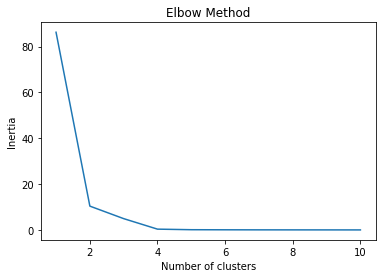

In [5]:
wcss = []
#elbow method
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=500,n_init=10,random_state=0)
    kmeans.fit(w)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [6]:
# Applying k-means to the raw neuron data set
n_clus=4
kmeans = KMeans(n_clusters=n_clus,init='k-means++',max_iter=500,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(w)

colors=['g','r','c','m','y','k','b']

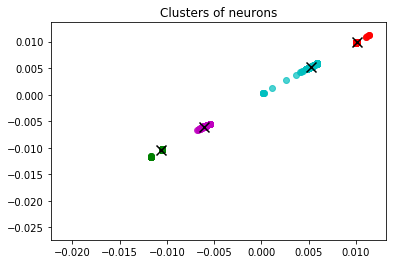

In [7]:
# Visualising the clusters
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')


for i in range(0,n_clus):
    plt.scatter(np.asarray(w)[y_kmeans == i, 0], np.asarray(w)[y_kmeans == i,3],c=colors[i], alpha=0.7)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,3],marker='x',s=100,c='black',label='Centroids')

   
plt.title('Clusters of neurons')
plt.show()

4

First eigen-vector var: 0.066260611638329  second var 0.0022432724425077762


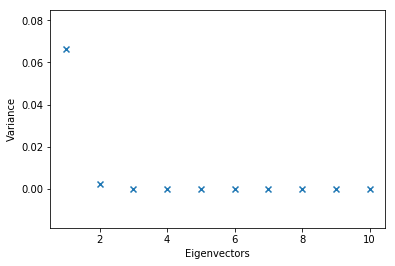

In [8]:
#Performing PCA on the raw data to extract features
#first, determines how  many eigen-images should be used to represent the variance
pca = PCA(n_components=10)
pca.fit(w)
var=pca.explained_variance_
n_com=np.linspace(1,10,10)
plt.scatter(n_com,var,marker='x')
plt.xlabel('Eigenvectors')
plt.ylabel('Variance')
print('First eigen-vector var:', var[0], ' second var', var[1])

In [9]:
#The results imply that two eigen vectors is enough
#Transforms the data to these 
pca=PCA(n_components=2)
pca.fit(w)
w_pca=pca.transform(w)
print(np.shape(w_pca))
np.shape(w)

(1260, 2)


(1260, 1024)

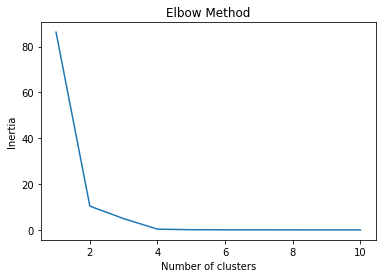

In [10]:
#repeat the same process as before
inert = []
#elbow method
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters=i,init='k-means++',max_iter=500,n_init=10)
    kmeans_pca.fit(w_pca)
    inert.append(kmeans_pca.inertia_)
plt.plot(range(1,11),inert)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

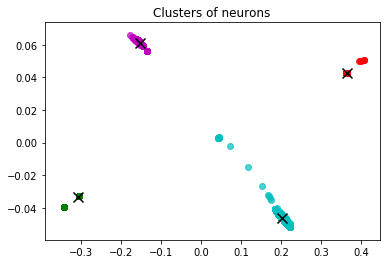

In [17]:
#Using the elbow results to generate the apropiate number of clusters
# Applying k-means to the raw neuron data set
n_pca=4
kmeans_pca = KMeans(n_clusters=n_pca,init='k-means++',max_iter=500,n_init=10,random_state=0) 
y_pca = kmeans_pca.fit_predict(w_pca)

for i in range(0,n_pca):
    plt.scatter(np.asarray(w_pca)[y_pca == i, 0], np.asarray(w_pca)[y_pca == i,1],c=colors[i], alpha=0.7)

plt.scatter(kmeans_pca.cluster_centers_[:,0], kmeans_pca.cluster_centers_[:,1],marker='x',s=100,c='black')


plt.title('Clusters of neurons')
plt.show()

In [18]:
#plots the weith matrices for the
def plots_w(wi):
    #spin number for the sides of the square
    n_s=int(np.sqrt(len(wi[0,:])))
    fig, ax = plt.subplots(4,4,figsize=(10,10))
    im=ax[0,0].imshow(wi[0,:].reshape(-1,n_s))
    ax[0,1].imshow(wi[1,:].reshape(-1,n_s))
    ax[0,2].imshow(wi[2,:].reshape(-1,n_s))
    ax[0,3].imshow(wi[3,:].reshape(-1,n_s))

    ax[1,0].imshow(wi[4,:].reshape(-1,n_s))
    ax[1,1].imshow(wi[5,:].reshape(-1,n_s))
    ax[1,2].imshow(wi[6,:].reshape(-1,n_s))
    ax[1,3].imshow(wi[7,:].reshape(-1,n_s))

    ax[2,0].imshow(wi[8,:].reshape(-1,n_s))
    ax[2,1].imshow(wi[9,:].reshape(-1,n_s))
    ax[2,2].imshow(wi[10,:].reshape(-1,n_s))
    ax[2,3].imshow(wi[11,:].reshape(-1,n_s))
    
    ax[3,0].imshow(wi[12,:].reshape(-1,n_s))
    ax[3,1].imshow(wi[13,:].reshape(-1,n_s))
    ax[3,2].imshow(wi[14,:].reshape(-1,n_s))
    ax[3,3].imshow(wi[15,:].reshape(-1,n_s))

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax)
print(np.shape(w))

(1260, 1024)


In [19]:
#selects the first cluster
clus0= np.asarray(w)[y_pca == 0,:]
#plots_w(clus0)

In [20]:
#finds the mean image of each cluster
#samples = [n_images,n_pixels]
print(np.shape(clus0))
def mean_im(samples):
    #number of spins
    n_s=int(np.sqrt(len(samples[0,:])))
    n_im= len(samples[:,0])
    #matrix form of the first image
    m=samples[0,:].reshape(-1,n_s)
    #matrix sum
    for i in range(1,len(samples)):
        mi=samples[i,:].reshape(-1,n_s)
        m= m+ mi
        
    return m/n_im

(339, 1024)


-3355.6204774841244
-3452.029645987748
-3254.965009025308
-3185.4224956581593


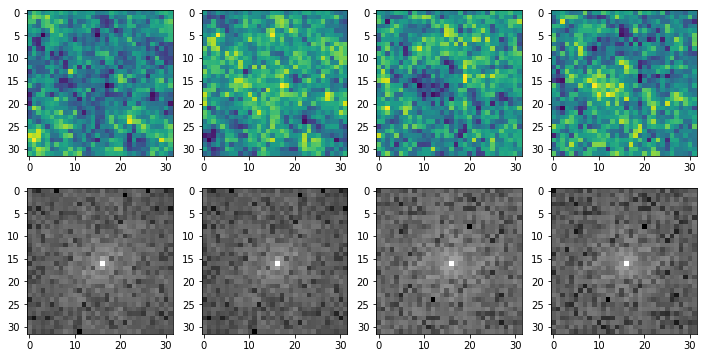

In [25]:
fig_mean, ax_mean= plt.subplots(2,4,figsize=(12,6))
np.asarray(w)[y_pca == 0,:]


for i in range(0,n_pca):    
    clus_mean=mean_im(np.asarray(w)[y_pca == i,:])
    #generates an output
    output=pd.DataFrame(clus_mean)
    output.to_csv('/Users/rasputin/Desktop/Uni/Tesis/Ising_NN/32x32/mean_w70_'+str(i)+'.csv')
    
    #fourier transforms the means
    f = np.fft.fft2(clus_mean)
    fshift = np.fft.fftshift(f) 
    magnitude_spectrum = np.log(np.abs(fshift))
    print(np.sum(magnitude_spectrum))
    ax_mean[0,i].imshow(clus_mean)
    ax_mean[1,i].imshow(magnitude_spectrum, cmap = 'gray')


In [16]:
#usar estas neuronas como mi red entrenada
#activacion maxima